# Outline
使用fuction API實作Resnet裡面的skip connection

In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [5]:
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_test -= x_test.min()
x_test = x_test/x_test.max()

In [6]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train ,10)
y_test = np_utils.to_categorical(y_test, 10)

In [7]:
from keras.models import Model
from keras.layers import Input, Activation, Dense, Dropout
from keras.layers import concatenate, add
from keras.callbacks import EarlyStopping, History
from keras.optimizers import SGD

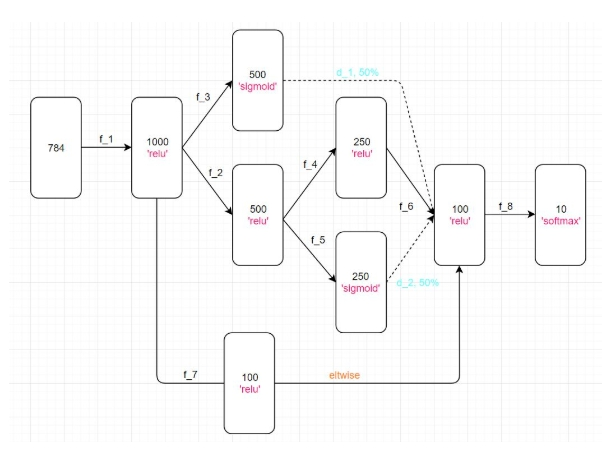

In [8]:
f_1 = Dense(1000, activation='relu')
f_2 = Dense(500, activation='relu')
f_3 = Dense(500, activation='sigmoid')
d_1 = Dropout(0.5)
f_4 = Dense(250, activation='relu')
f_5 = Dense(250, activation='sigmoid')
d_2 = Dropout(0.5)
f_6 = Dense(100, activation='relu')
f_7 = Dense(100, activation='relu')
f_8 = Dense(10, activation='softmax')

In [9]:
x = Input(shape=(784,))
h_1 = f_1(x)
h_2 = f_2(h_1)
h_3 = f_3(h_1)
h_4 = f_4(h_2)
h_5 = f_5(h_2)
con_1 = concatenate([d_1(h_3), h_4, d_2(h_5)])
h_6 = f_6(con_1)
h_7 = f_7(h_1)
y = f_8(add([h_6, h_7]))

In [10]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1000)         785000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          500500      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 500)          500500      dense_1[0][0]                    
__________________________________________________________________________________________________
dense_5 (D

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [12]:
skip_connect=model.fit(x_train, y_train, batch_size=100, epochs=20, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 26s 482us/step - loss: 0.9419 - acc: 0.7444 - val_loss: 0.3909 - val_acc: 0.9050
Epoch 2/20
54000/54000 [==============================] - 27s 492us/step - loss: 0.4076 - acc: 0.8868 - val_loss: 0.2863 - val_acc: 0.9222
Epoch 3/20
54000/54000 [==============================] - 43s 794us/step - loss: 0.3342 - acc: 0.9049 - val_loss: 0.2520 - val_acc: 0.9308
Epoch 4/20
54000/54000 [==============================] - 43s 804us/step - loss: 0.2986 - acc: 0.9136 - val_loss: 0.2300 - val_acc: 0.9343
Epoch 5/20
54000/54000 [==============================] - 44s 816us/step - loss: 0.2738 - acc: 0.9220 - val_loss: 0.2151 - val_acc: 0.9402
Epoch 6/20
54000/54000 [==============================] - 44s 816us/step - loss: 0.2552 - acc: 0.9271 - val_loss: 0.2024 - val_acc: 0.9447
Epoch 7/20
54000/54000 [==============================] - 45s 828us/step - loss: 0.2390 - acc: 0.9320 - val_loss: 0.1

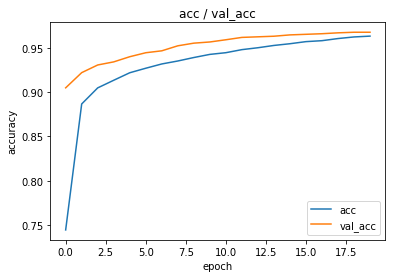

In [13]:
plt.plot(skip_connect.history['acc'])
plt.plot(skip_connect.history['val_acc'])
plt.title('acc / val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc = 'best')
plt.show()

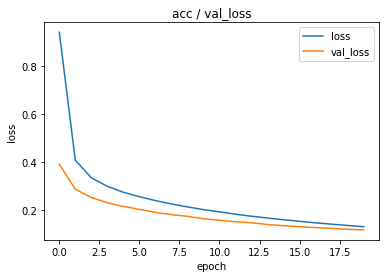

In [14]:
plt.plot(skip_connect.history['loss'])
plt.plot(skip_connect.history['val_loss'])
plt.title('acc / val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'best')
plt.show()